In [1]:
%matplotlib inline
import numpy as np
import plyfile
import os
import glob
import re
import cv2
from matplotlib import pyplot as plt

In [2]:
base_dir = '/home/ayushj2/scan_refer/ScanRefer/data'
frames_square = os.path.join(base_dir, 'frames_square')
train_file = os.path.join(base_dir, 'ScanRefer_filtered_train.txt')
val_file = os.path.join(base_dir, 'ScanRefer_filtered_val.txt')
world2grid = os.path.join(frames_square, 'world2grid.txt')

In [3]:
temp_scene_file = os.path.join(frames_square, 'scene0000_00')
color_dir = os.path.join(temp_scene_file, 'color')
pose_dir = os.path.join(temp_scene_file, 'pose')
depth_dir = os.path.join(temp_scene_file, 'depth')

In [4]:
temp_temp_color_img = os.path.join(color_dir, '0.jpg')
temp_temp_depth_img = os.path.join(depth_dir, '0.jpg')
temp_temp_pose_txt = os.path.join(pose_dir, '0.txt')

## Pose

In [5]:
# Pose

pose_text = open(temp_temp_pose_txt, 'r').read()
print(pose_text)

pose_mat = np.loadtxt(temp_temp_pose_txt, usecols=range(4))
print(pose_mat)
print(pose_mat.shape)

-0.955421 0.119616 -0.269932 2.65583
0.295248 0.388339 -0.872939 2.9816
0.000407581 -0.91372 -0.406343 1.36865
0 0 0 1

[[-9.55421e-01  1.19616e-01 -2.69932e-01  2.65583e+00]
 [ 2.95248e-01  3.88339e-01 -8.72939e-01  2.98160e+00]
 [ 4.07581e-04 -9.13720e-01 -4.06343e-01  1.36865e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]
(4, 4)


In [6]:
filelist = sorted(glob.glob(os.path.join(pose_dir, '*.txt')), key=lambda f: int(re.sub('\D', '', f)))
num_files = len(filelist)
big_pose_mat = np.empty((num_files, 4, 4))

for k, file in  enumerate(filelist):
    big_pose_mat[k,:,:] = np.loadtxt(filelist[k], usecols=range(4))

print(big_pose_mat.shape)

(279, 4, 4)


# RGB Imgs

(240, 320, 3)


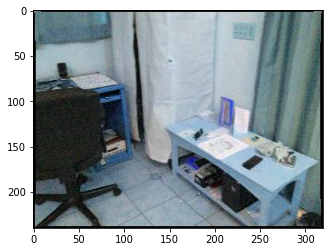

In [7]:
rgb_img = cv2.imread(os.path.join(color_dir, '0.jpg'))
print(rgb_img.shape)
plt.imshow(rgb_img)
plt.show()

In [15]:
filelist = sorted(glob.glob(os.path.join(color_dir, '*.jpg')), key=lambda f: int(re.sub('\D', '', f)))
num_files = len(filelist)
big_rgb_mat = np.empty((num_files, 240, 320, 3))

for k, file in  enumerate(filelist):
    big_rgb_mat[k,:,:,:] = cv2.imread(os.path.join(color_dir, file))

print(big_rgb_mat.shape)

(279, 240, 320, 3)
